In [810]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import datetime 
import os

In [729]:
print(os.getcwd())

/Users/innakonar/Desktop/PythonScripts


In [778]:
data = pd.read_csv('./fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [779]:
df=data.copy()

In [732]:
dim=data.shape
print(f"Rows:{dim[0]} Columns:{dim[1]}")

Rows:320772 Columns:162


In [733]:
df.dtypes.value_counts()


float64    106
object      56
dtype: int64

In [734]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [735]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***La base de données sur les aliments contient des informations sur divers produits fabriqués 
et vendus dans différents pays du monde. 
Le nombre total de produits dans la base de données est supérieur à 1,5 million d'enregistrements.

Chaque entrée contient les informations produit suivantes :
1)nom du produit ;
2)marque;
3)catégorie de produit;
4)la quantité de substances alimentaires (protéines, lipides, glucides);
5)la teneur en diverses vitamines et minéraux;
6)la présence de divers additifs (conservateurs, arômes, etc.) ;
7)pays de fabrication;
8)le magasin où le produit peut être acheté ;
9)évaluation du produit et sa popularité auprès des utilisateurs.

Variables pouvant être mises en évidence dans cette base de données :

1)nom du produit (product_name) ;
2)marque (brands);
3)catégorie de produit (categories);
4)quantité de nutriments (fat_100g, carbohydrates_100g, proteins_100g);
5)teneur en vitamines et minéraux (vitamin_XXX_100g, minerals_100g);
6)présence d'additifs (additives_n, additives_tags) ;
7)pays de fabrication (countries);
8)magasin où le produit peut être acheté (stores);
9)la note du produit et sa popularité auprès des utilisateurs (nutrition_score_fr_100g, popularity_key_100g).

Les variables graisses_100g, glucides_100g et protéines_100g peuvent contenir des valeurs manquantes 
qui doivent être traitées.
La variable additifs_n contient le nombre d'additifs, donc de grandes valeurs sont possibles.
Une analyse préliminaire de la base de données devrait également être effectuée 
pour détecter d'autres caractéristiques et anomalies.***

Number of missing values:
 code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

Percentage of missing values:
 last_modified_t                            0.000000
last_modified_datetime                     0.000000
creator                                    0.000623
created_t                                  0.000935
created_datetime                           0.002806
                                            ...    
ingredients_that_may_be_from_palm_oil    100.000000
ingredients_from_palm_oil                100.000000
no_nutriments                            100.000000
nervonic-acid_100g                       100.000000
water-hardness_100g  

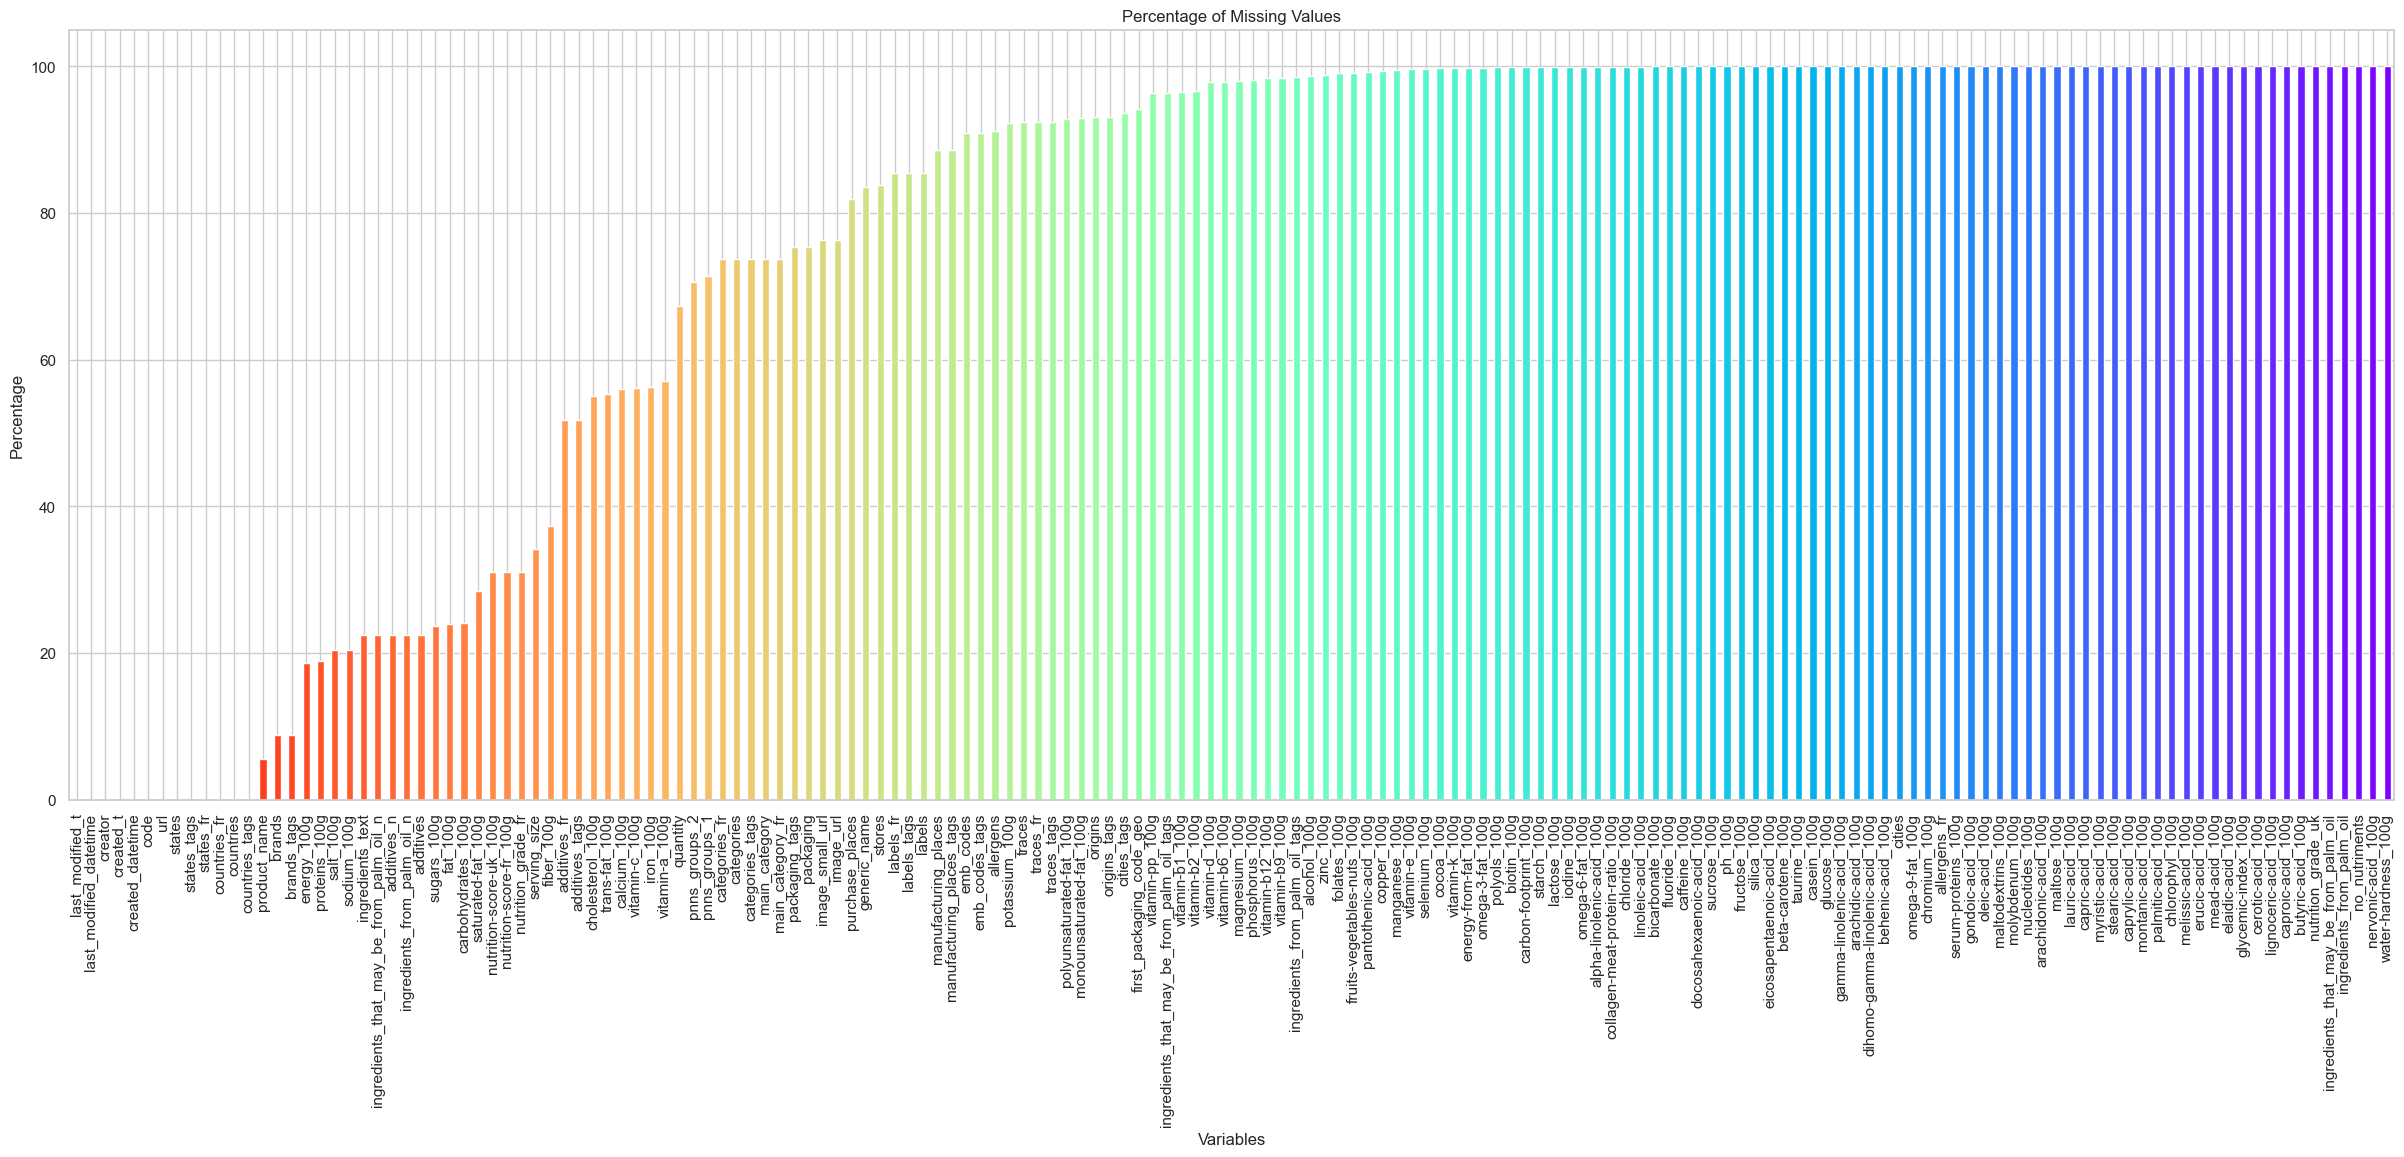

In [780]:
def calculate_missing_values(df):
    missing_values_count = df.isnull().sum()
    missing_values_percentage = 100 * missing_values_count / len(df)
    print("Number of missing values:\n", missing_values_count)
    print("\nPercentage of missing values:\n", missing_values_percentage.sort_values())
    plt.figure(figsize=(30,10))
    sorted_missing_values = missing_values_percentage.sort_values()
    color_values = plt.cm.rainbow_r(np.linspace(0, 1, len(sorted_missing_values)))
    sorted_missing_values.plot(kind='bar', color=color_values)
    plt.title('Percentage of Missing Values')
    plt.xlabel('Variables')
    plt.ylabel('Percentage')
    plt.savefig("my_plot1.JPEG", bbox_inches="tight")
calculate_missing_values(df)


In [781]:
def df_clean(df, threshold):
    # Supprime les lignes et colonnes totalement vides
    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all')

    # Supprime les lignes ayant un nombre de valeurs manquantes supérieur au seuil
    row_limit = int(((100 - threshold) / 100) * df.shape[1]+1)
    df = df.dropna(axis=0, thresh=row_limit)
    
    # Supprime les colonnes ayant un nombre de valeurs manquantes supérieur au seuil
    column_limit = int(((100 - threshold) / 100) * df.shape[0]+1)
    df = df.dropna(axis=1, thresh=column_limit)
 
    print(df.shape)
    return df

df = df_clean(df, 65)


(42393, 63)


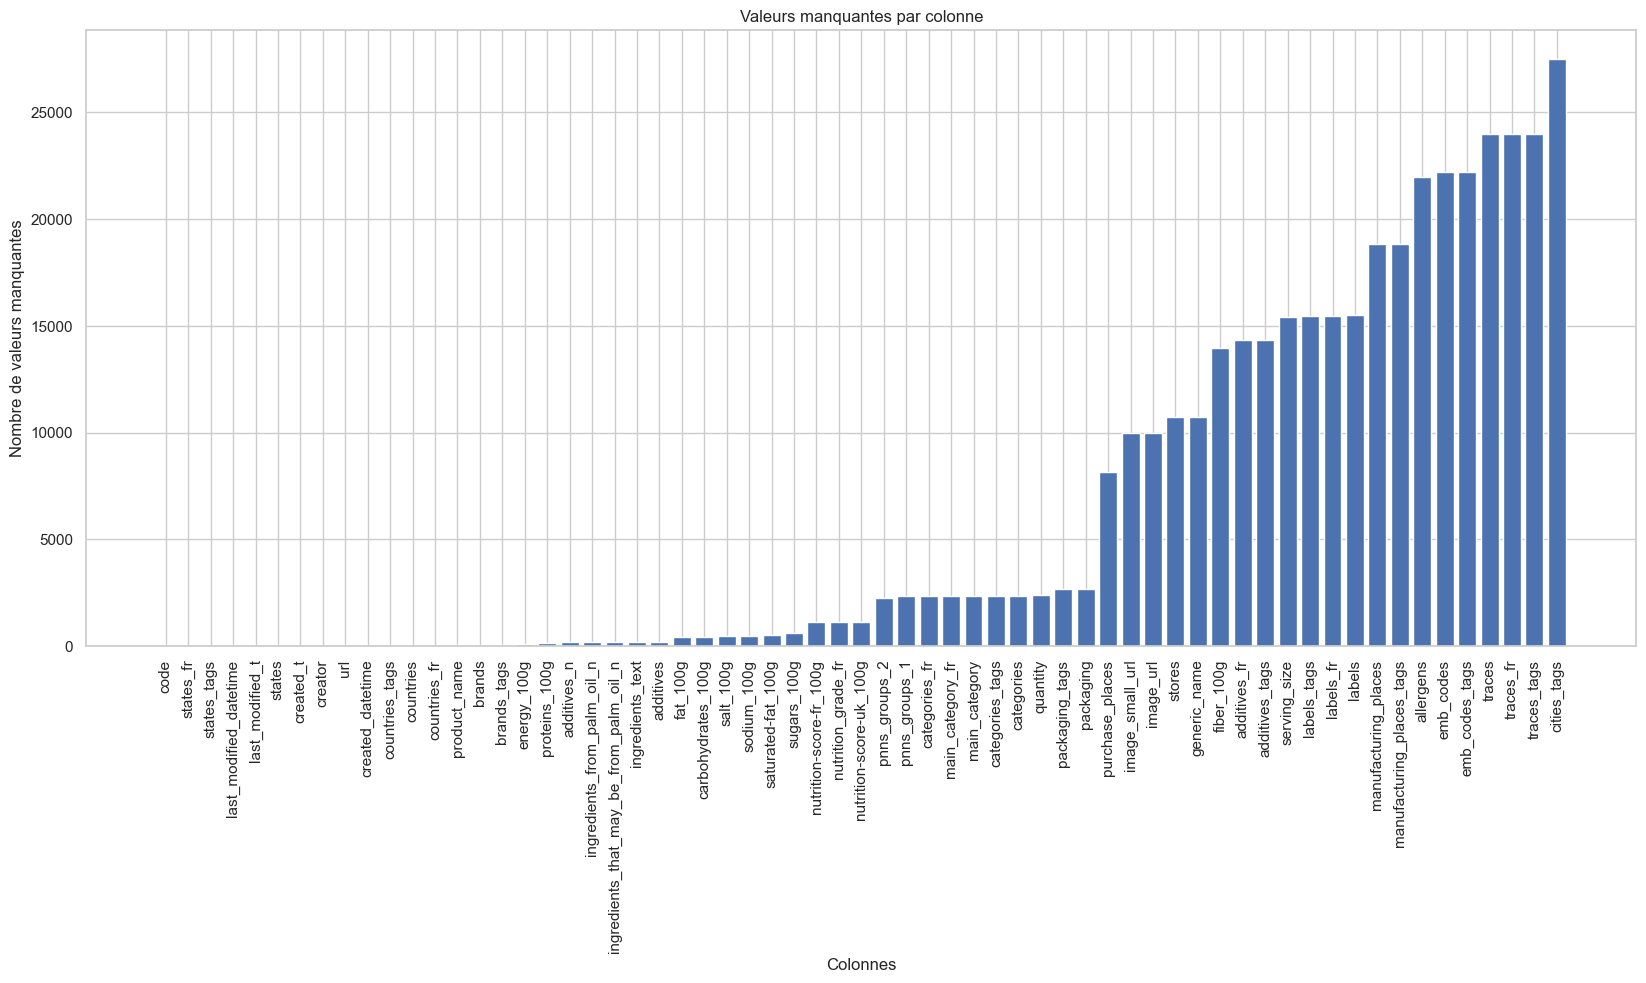

In [782]:
def plot_missing_values(df):
    # nombre de valeurs manquantes par colonne
    na_counts = df.isna().sum().sort_values()

    # créer un diagramme en barres
    plt.figure(figsize=(20,8))
    plt.bar(na_counts.index, na_counts)
    plt.xlabel('Colonnes')
    plt.ylabel('Nombre de valeurs manquantes')
    plt.title('Valeurs manquantes par colonne')
    plt.xticks(rotation=90)
    plt.savefig("my_plot3.JPEG", bbox_inches="tight")
    plt.show()
    
plot_missing_values(df)


Number of missing values:
 code                          0
url                           0
creator                       0
created_t                     0
created_datetime              1
                           ... 
proteins_100g               122
salt_100g                   472
sodium_100g                 472
nutrition-score-fr_100g    1119
nutrition-score-uk_100g    1119
Length: 63, dtype: int64

Percentage of missing values:
 code                       0.000000
states_fr                  0.000000
states_tags                0.000000
last_modified_datetime     0.000000
last_modified_t            0.000000
                            ...    
emb_codes_tags            52.400160
traces                    56.584814
traces_fr                 56.587172
traces_tags               56.587172
cities_tags               64.843252
Length: 63, dtype: float64


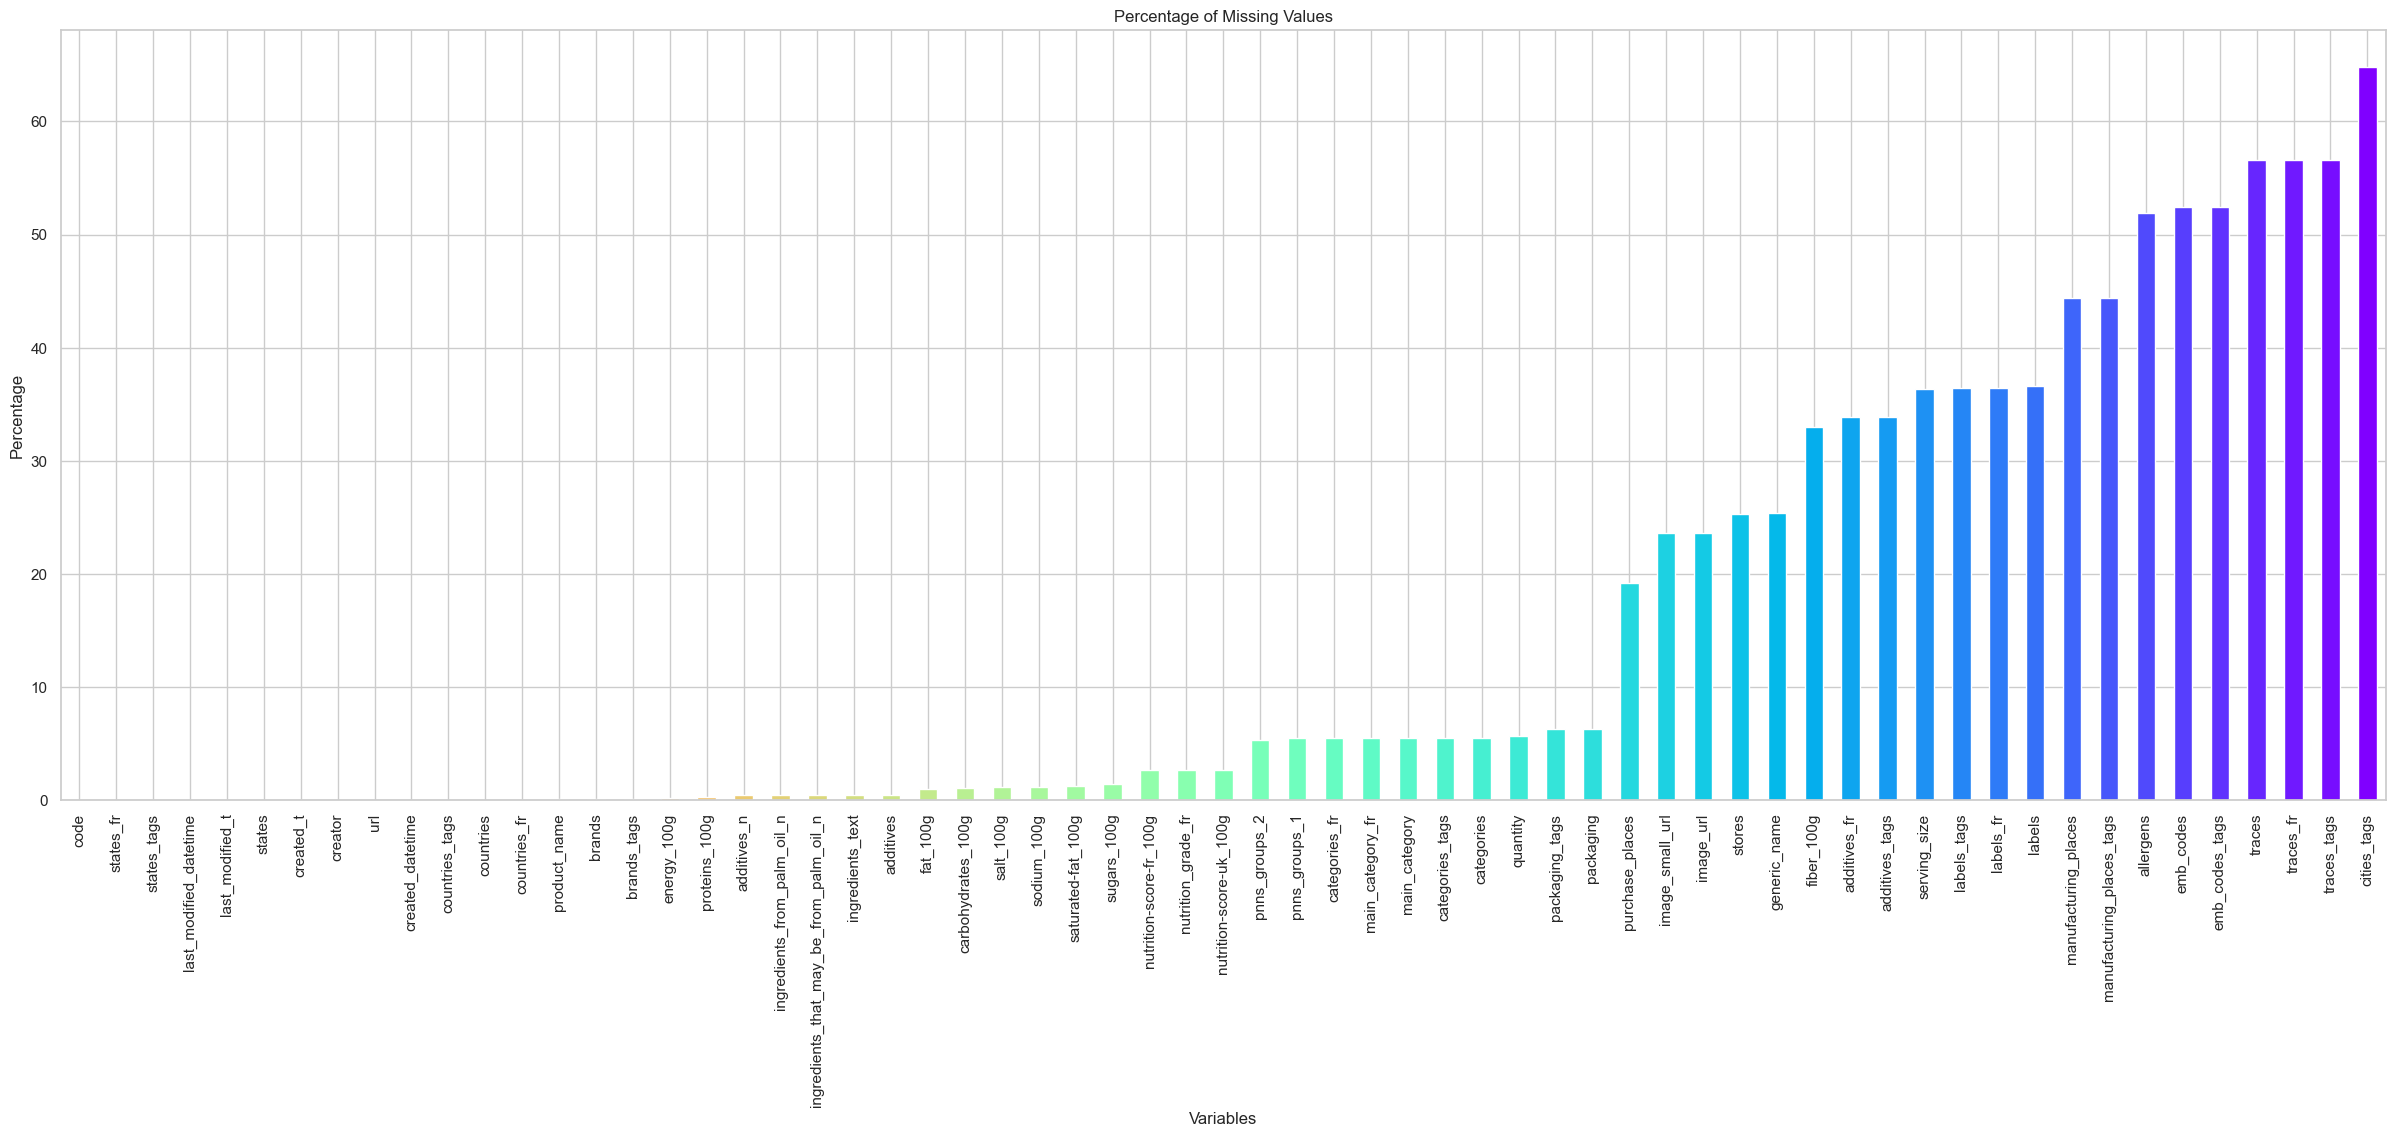

In [783]:
calculate_missing_values(df)


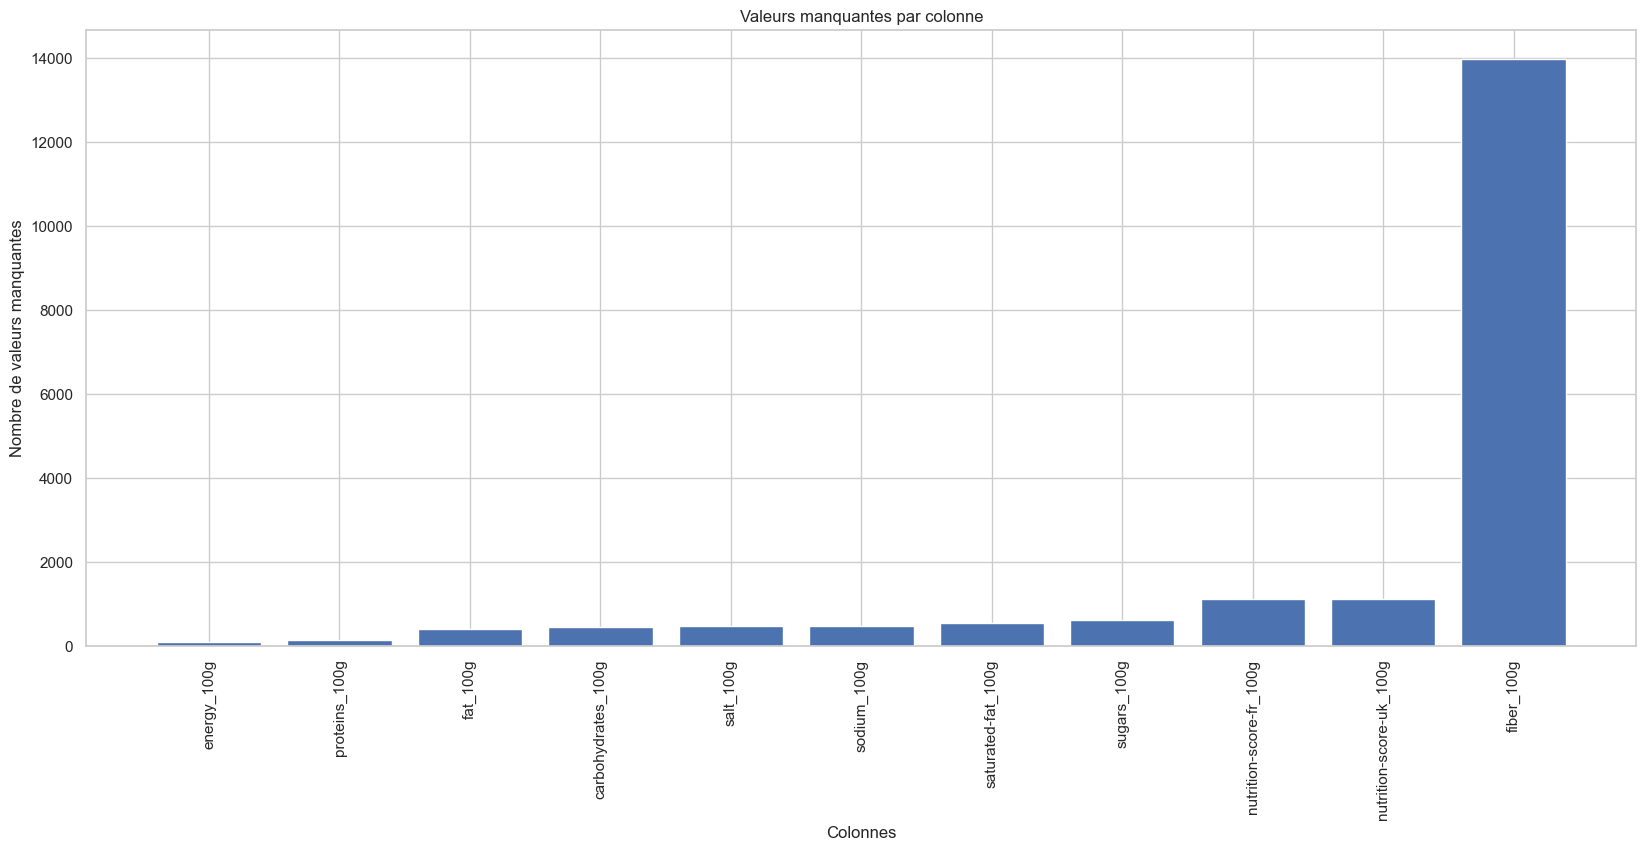

In [784]:
# sélectionner toutes les variables qui contiennent "...100g" dans leur nom
cols = df.filter(regex='.*100g$').columns.tolist()
df_substances_100g = df[cols]

plot_missing_values(df_substances_100g)



In [785]:
df_substances_100g


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
174,1210.0,12.00,7.000,23.00,0.000,2.000,22.000,2.16000,0.850000,6.0,6.0
175,1520.0,14.40,NaN,54.10,28.100,2.050,4.790,0.92200,0.363000,NaN,NaN
180,1090.0,10.70,2.000,38.70,24.700,2.000,3.330,0.64700,0.255000,9.0,9.0
181,1160.0,1.11,0.333,53.30,1.110,2.220,10.000,1.52000,0.600000,1.0,1.0
185,478.0,6.79,2.860,7.86,0.714,0.357,5.360,0.49900,0.196000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
320681,1017.0,1.30,1.280,95.87,0.120,0.005,0.040,0.00500,0.001969,4.0,4.0
320683,444.0,0.50,0.000,0.00,0.000,0.000,25.000,0.76200,0.300000,-1.0,-1.0
320692,2111.0,53.30,3.800,6.40,5.300,0.500,1.700,1.75006,0.689000,17.0,17.0
320693,660.0,6.90,0.500,23.10,16.700,0.600,0.300,0.54102,0.213000,6.0,6.0


In [786]:
# sélectionner  les variables:

informations_produit=['product_name',
 'creator',
 'created_t',
 'last_modified_t',
 'created_datetime',
 'last_modified_datetime',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'countries',
 'countries_fr',
 'brands',
 'nutrition_grade_fr']

informations_produit

['product_name',
 'creator',
 'created_t',
 'last_modified_t',
 'created_datetime',
 'last_modified_datetime',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'countries',
 'countries_fr',
 'brands',
 'nutrition_grade_fr']

In [787]:
informations_produit.extend(df_substances_100g)
df=df[informations_produit]
df.head()

,product_name,creator,created_t,last_modified_t,created_datetime,last_modified_datetime,states,states_tags,states_fr,main_category,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
174,Salade Cesar,b7,1484605978,1484606542,2017-01-16T22:32:58Z,2017-01-16T22:42:22Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,...,12.00,7.000,23.00,0.000,2.000,22.00,2.160,0.850,6.0,6.0
175,Danoises à la cannelle roulées,b7,1484497370,1484501040,2017-01-15T16:22:50Z,2017-01-15T17:24:00Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,14.40,NaN,54.10,28.100,2.050,4.79,0.922,0.363,NaN,NaN
180,Chaussons tressés aux pommes,b7,1484501528,1484504972,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,10.70,2.000,38.70,24.700,2.000,3.33,0.647,0.255,9.0,9.0
181,Pain Burger Artisan,b7,1488464896,1488465687,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:boulange,...,1.11,0.333,53.30,1.110,2.220,10.00,1.520,0.600,1.0,1.0
185,Quiche Lorraine,b7,1491943307,1491944488,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,...,6.79,2.860,7.86,0.714,0.357,5.36,0.499,0.196,2.0,2.0


In [788]:
df.isna().sum()

product_name                  26
creator                        0
created_t                      0
last_modified_t                0
created_datetime               1
last_modified_datetime         0
states                         0
states_tags                    0
states_fr                      0
main_category               2332
main_category_fr            2332
countries                      9
countries_fr                   9
brands                        45
nutrition_grade_fr          1119
energy_100g                   78
fat_100g                     399
saturated-fat_100g           526
carbohydrates_100g           440
sugars_100g                  606
fiber_100g                 13981
proteins_100g                122
salt_100g                    472
sodium_100g                  472
nutrition-score-fr_100g     1119
nutrition-score-uk_100g     1119
dtype: int64

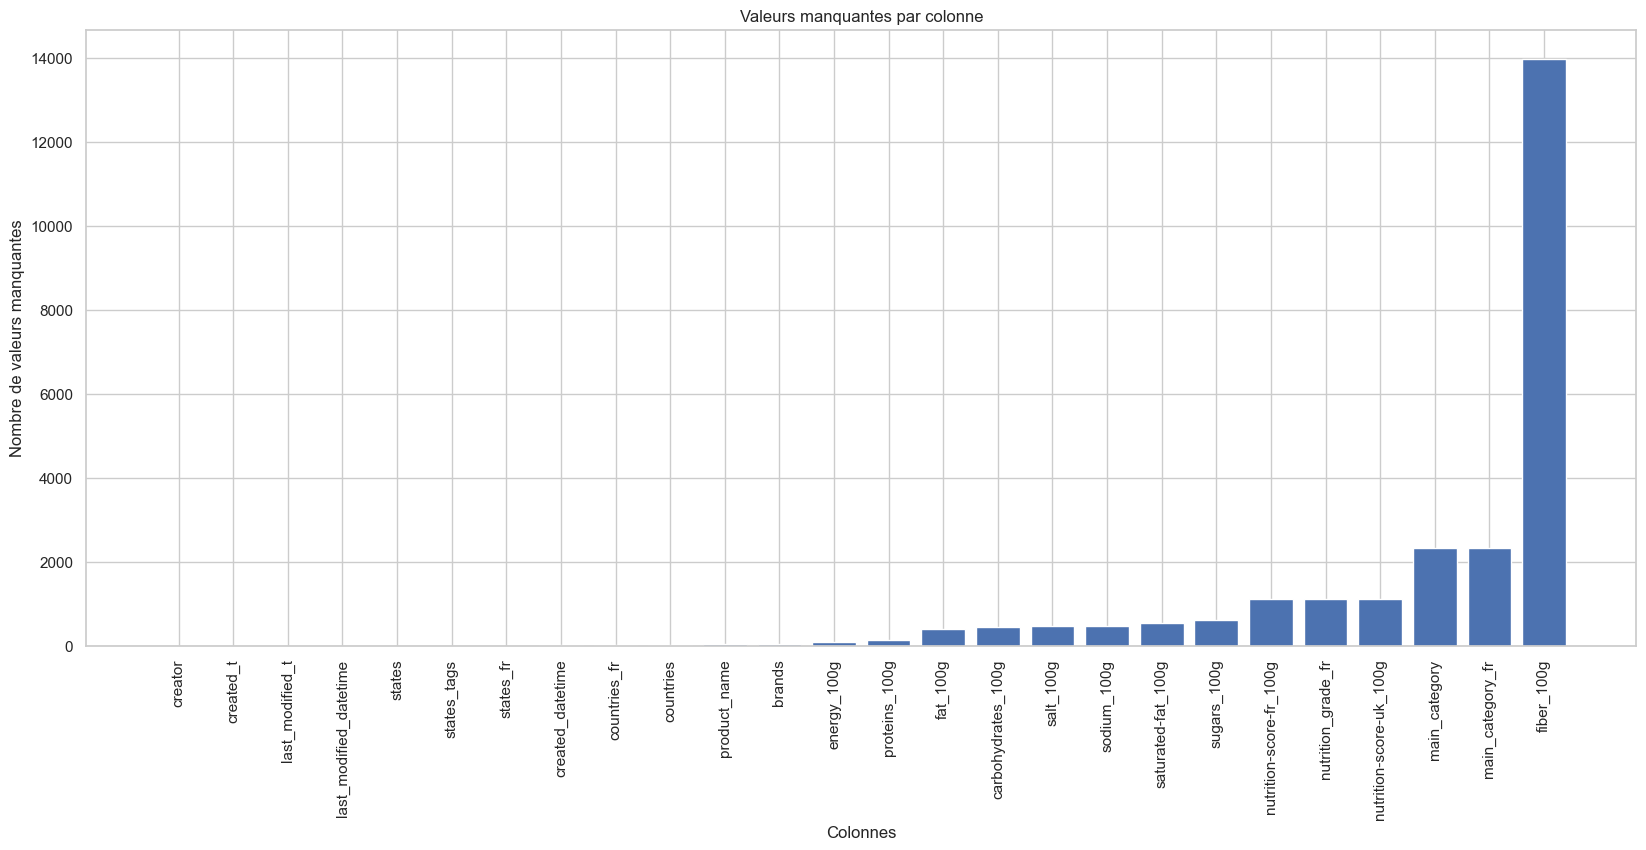

In [789]:
plot_missing_values(df)


In [790]:
#Estimation  created_datetime
def fill_missing_created_datetime(df):
    # Set default value to '01-01-2010'
    default_date = pd.to_datetime('01-01-2010', format='%d-%m-%Y')

    # Convert 'created_t' column to datetime
    df['created_t'] = pd.to_datetime(df['created_t'], unit='s', errors='coerce')

    # Fill missing values in 'created_datetime' with values from 'created_t'
    df['created_datetime'] = df['created_datetime'].fillna(df['created_t'].fillna(default_date))

    return df
fill_missing_created_datetime(df)


,product_name,creator,created_t,last_modified_t,created_datetime,last_modified_datetime,states,states_tags,states_fr,main_category,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
174,Salade Cesar,b7,2017-01-16 22:32:58,1484606542,2017-01-16T22:32:58Z,2017-01-16T22:42:22Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,...,12.00,7.000,23.00,0.000,2.000,22.000,2.16000,0.850000,6.0,6.0
175,Danoises à la cannelle roulées,b7,2017-01-15 16:22:50,1484501040,2017-01-15T16:22:50Z,2017-01-15T17:24:00Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,14.40,NaN,54.10,28.100,2.050,4.790,0.92200,0.363000,NaN,NaN
180,Chaussons tressés aux pommes,b7,2017-01-15 17:32:08,1484504972,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,10.70,2.000,38.70,24.700,2.000,3.330,0.64700,0.255000,9.0,9.0
181,Pain Burger Artisan,b7,2017-03-02 14:28:16,1488465687,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:boulange,...,1.11,0.333,53.30,1.110,2.220,10.000,1.52000,0.600000,1.0,1.0
185,Quiche Lorraine,b7,2017-04-11 20:41:47,1491944488,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,...,6.79,2.860,7.86,0.714,0.357,5.360,0.49900,0.196000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320681,Spearmint sans sucres,namnam,2015-03-14 14:32:26,1445328628,2015-03-14T14:32:26Z,2015-10-20T08:10:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:candies,...,1.30,1.280,95.87,0.120,0.005,0.040,0.00500,0.001969,4.0,4.0
320683,tuna chunks in spring water,kyzh,2015-01-03 14:50:00,1427548848,2015-01-03T14:50:00Z,2015-03-28T13:20:48Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:tunas,...,0.50,0.000,0.00,0.000,0.000,25.000,0.76200,0.300000,-1.0,-1.0
320692,Blue Cheese Dressing,tacinte,2014-09-06 17:59:02,1410027263,2014-09-06T17:59:02Z,2014-09-06T18:14:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,53.30,3.800,6.40,5.300,0.500,1.700,1.75006,0.689000,17.0,17.0
320693,Santa Cruz Chilli & Lime Dressing,tacinte,2014-09-06 17:16:40,1410027323,2014-09-06T17:16:40Z,2014-09-06T18:15:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,6.90,0.500,23.10,16.700,0.600,0.300,0.54102,0.213000,6.0,6.0


In [791]:
df.isna().sum()

product_name                  26
creator                        0
created_t                      0
last_modified_t                0
created_datetime               0
last_modified_datetime         0
states                         0
states_tags                    0
states_fr                      0
main_category               2332
main_category_fr            2332
countries                      9
countries_fr                   9
brands                        45
nutrition_grade_fr          1119
energy_100g                   78
fat_100g                     399
saturated-fat_100g           526
carbohydrates_100g           440
sugars_100g                  606
fiber_100g                 13981
proteins_100g                122
salt_100g                    472
sodium_100g                  472
nutrition-score-fr_100g     1119
nutrition-score-uk_100g     1119
dtype: int64

In [792]:
#Traitement des doublons
df.duplicated('product_name').sum()

6040

In [793]:
df=df.drop_duplicates('product_name')
df

,product_name,creator,created_t,last_modified_t,created_datetime,last_modified_datetime,states,states_tags,states_fr,main_category,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
174,Salade Cesar,b7,2017-01-16 22:32:58,1484606542,2017-01-16T22:32:58Z,2017-01-16T22:42:22Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,...,12.00,7.000,23.00,0.000,2.000,22.000,2.16000,0.850000,6.0,6.0
175,Danoises à la cannelle roulées,b7,2017-01-15 16:22:50,1484501040,2017-01-15T16:22:50Z,2017-01-15T17:24:00Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,14.40,NaN,54.10,28.100,2.050,4.790,0.92200,0.363000,NaN,NaN
180,Chaussons tressés aux pommes,b7,2017-01-15 17:32:08,1484504972,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,10.70,2.000,38.70,24.700,2.000,3.330,0.64700,0.255000,9.0,9.0
181,Pain Burger Artisan,b7,2017-03-02 14:28:16,1488465687,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:boulange,...,1.11,0.333,53.30,1.110,2.220,10.000,1.52000,0.600000,1.0,1.0
185,Quiche Lorraine,b7,2017-04-11 20:41:47,1491944488,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,...,6.79,2.860,7.86,0.714,0.357,5.360,0.49900,0.196000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320681,Spearmint sans sucres,namnam,2015-03-14 14:32:26,1445328628,2015-03-14T14:32:26Z,2015-10-20T08:10:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:candies,...,1.30,1.280,95.87,0.120,0.005,0.040,0.00500,0.001969,4.0,4.0
320683,tuna chunks in spring water,kyzh,2015-01-03 14:50:00,1427548848,2015-01-03T14:50:00Z,2015-03-28T13:20:48Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:tunas,...,0.50,0.000,0.00,0.000,0.000,25.000,0.76200,0.300000,-1.0,-1.0
320692,Blue Cheese Dressing,tacinte,2014-09-06 17:59:02,1410027263,2014-09-06T17:59:02Z,2014-09-06T18:14:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,53.30,3.800,6.40,5.300,0.500,1.700,1.75006,0.689000,17.0,17.0
320693,Santa Cruz Chilli & Lime Dressing,tacinte,2014-09-06 17:16:40,1410027323,2014-09-06T17:16:40Z,2014-09-06T18:15:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,6.90,0.500,23.10,16.700,0.600,0.300,0.54102,0.213000,6.0,6.0


In [794]:
df.isna().sum()

product_name                   1
creator                        0
created_t                      0
last_modified_t                0
created_datetime               0
last_modified_datetime         0
states                         0
states_tags                    0
states_fr                      0
main_category               1622
main_category_fr            1622
countries                      8
countries_fr                   8
brands                        31
nutrition_grade_fr           986
energy_100g                   72
fat_100g                     347
saturated-fat_100g           455
carbohydrates_100g           378
sugars_100g                  529
fiber_100g                 12061
proteins_100g                109
salt_100g                    412
sodium_100g                  412
nutrition-score-fr_100g      986
nutrition-score-uk_100g      986
dtype: int64

In [795]:
def impute_mode(df):
    imputed_df = df.copy()
    imputed_df.replace({'': np.nan}, inplace=True)
    na_columns = imputed_df.columns[imputed_df.isna().any()].tolist()
    for col in na_columns:
        if '100g' in col:
            imputer = IterativeImputer(max_iter=10, random_state=0, initial_strategy='median')
            imputed_df[col] = imputer.fit_transform(imputed_df[[col]])
        else:
            imputer = SimpleImputer(strategy='most_frequent')
            imputed_df = pd.DataFrame(imputer.fit_transform(imputed_df), columns=imputed_df.columns)
    return imputed_df
df=impute_mode(df)


In [796]:
df.isnull().sum()

product_name               0
creator                    0
created_t                  0
last_modified_t            0
created_datetime           0
last_modified_datetime     0
states                     0
states_tags                0
states_fr                  0
main_category              0
main_category_fr           0
countries                  0
countries_fr               0
brands                     0
nutrition_grade_fr         0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
dtype: int64

L'échelle nutritionnelle utilisée en France répond aux exigences légales d'indication des propriétés nutritionnelles sur les étiquettes des aliments. Cette échelle se compose de cinq classes, désignées par les lettres A à E, où la classe A signifie la meilleure valeur nutritionnelle et la classe E - la pire. La définition de la classe dépend de l'indicateur de la valeur nutritionnelle du produit, mesurée en calories, et de la teneur en graisses, sucres, sel, protéines et autres composants qu'il contient.

Les critères utilisés pour déterminer la classe de produits sont normalisés et établis conformément à la législation. En particulier, pour les produits à forte teneur en graisses, sucres et sel, des critères supplémentaires sont établis qui abaissent leur classe.

"Décret n° 2016-185 du 23 février 2016 relatif à la déclaration de la teneur en acides gras trans des denrées alimentaires et à la généralisation du système d'étiquetage nutritionnel"

In [797]:
def fill_nutrition_grade_fr(row):
    fr = row['nutrition-score-fr_100g']
    
    if np.isnan(fr):
        return np.nan

    return 'E' if fr >= 19 else \
           'D' if fr >= 11 else \
           'C' if fr >= 3 else \
           'B' if fr >= 1 else \
           'A' if fr <= 0 else \
           np.nan

df['nutrition_grade_fr'] = df.apply(fill_nutrition_grade_fr, axis=1)




In [798]:
df['nutrition_grade_fr']

0        C
1        B
2        C
3        B
4        B
        ..
36348    C
36349    A
36350    D
36351    C
36352    B
Name: nutrition_grade_fr, Length: 36353, dtype: object

In [799]:
df

,product_name,creator,created_t,last_modified_t,created_datetime,last_modified_datetime,states,states_tags,states_fr,main_category,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Salade Cesar,b7,2017-01-16 22:32:58,1484606542,2017-01-16T22:32:58Z,2017-01-16T22:42:22Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,...,12.00,7.000,23.00,0.000,2.000,22.000,2.16000,0.850000,6.0,6.0
1,Danoises à la cannelle roulées,b7,2017-01-15 16:22:50,1484501040,2017-01-15T16:22:50Z,2017-01-15T17:24:00Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,14.40,0.000,54.10,28.100,2.050,4.790,0.92200,0.363000,1.0,0.0
2,Chaussons tressés aux pommes,b7,2017-01-15 17:32:08,1484504972,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,10.70,2.000,38.70,24.700,2.000,3.330,0.64700,0.255000,9.0,9.0
3,Pain Burger Artisan,b7,2017-03-02 14:28:16,1488465687,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:boulange,...,1.11,0.333,53.30,1.110,2.220,10.000,1.52000,0.600000,1.0,1.0
4,Quiche Lorraine,b7,2017-04-11 20:41:47,1491944488,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,...,6.79,2.860,7.86,0.714,0.357,5.360,0.49900,0.196000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36348,Spearmint sans sucres,namnam,2015-03-14 14:32:26,1445328628,2015-03-14T14:32:26Z,2015-10-20T08:10:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:candies,...,1.30,1.280,95.87,0.120,0.005,0.040,0.00500,0.001969,4.0,4.0
36349,tuna chunks in spring water,kyzh,2015-01-03 14:50:00,1427548848,2015-01-03T14:50:00Z,2015-03-28T13:20:48Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:tunas,...,0.50,0.000,0.00,0.000,0.000,25.000,0.76200,0.300000,-1.0,-1.0
36350,Blue Cheese Dressing,tacinte,2014-09-06 17:59:02,1410027263,2014-09-06T17:59:02Z,2014-09-06T18:14:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,53.30,3.800,6.40,5.300,0.500,1.700,1.75006,0.689000,17.0,17.0
36351,Santa Cruz Chilli & Lime Dressing,tacinte,2014-09-06 17:16:40,1410027323,2014-09-06T17:16:40Z,2014-09-06T18:15:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,6.90,0.500,23.10,16.700,0.600,0.300,0.54102,0.213000,6.0,6.0


In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36353 entries, 0 to 36352
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_name             36353 non-null  object        
 1   creator                  36353 non-null  object        
 2   created_t                36353 non-null  datetime64[ns]
 3   last_modified_t          36353 non-null  object        
 4   created_datetime         36353 non-null  object        
 5   last_modified_datetime   36353 non-null  object        
 6   states                   36353 non-null  object        
 7   states_tags              36353 non-null  object        
 8   states_fr                36353 non-null  object        
 9   main_category            36353 non-null  object        
 10  main_category_fr         36353 non-null  object        
 11  countries                36353 non-null  object        
 12  countries_fr             36353 n

In [801]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000,36353.000000
mean,1155.193332,13.482499,5.531499,29.265788,12.893384,2.062054,8.221404,1.095446,0.431273,8.449069,8.315765
std,758.849088,15.740136,7.972332,27.663534,17.403166,3.638019,7.503936,4.013022,1.579741,9.024733,9.398776
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-14.000000,-14.000000
25%,477.000000,2.000000,0.400000,4.400000,1.000000,0.000000,3.000000,0.100000,0.039370,1.000000,0.000000
50%,1090.000000,7.800000,2.200000,17.000000,4.000000,0.500000,6.500000,0.612140,0.241000,8.000000,7.000000
75%,1700.000000,21.400000,7.900000,55.000000,19.800000,2.900000,11.000000,1.270000,0.500000,15.000000,16.000000
max,18700.000000,380.000000,210.000000,190.000000,104.000000,87.500000,86.000000,211.000000,83.000000,40.000000,35.000000


In [802]:
def remove_outliers(df, lower_bound, upper_bound):
    df_no_outliers = df.mask((df < lower_bound) | (df > upper_bound), np.nan)
    return df_no_outliers

In [803]:
df_100g = df.filter(like='100g')
nutr_cols = [col for col in df_100g.columns if col not in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'energy_100g']]
df_nutriments = df_100g[nutr_cols]
df_nutriments_no_outliers = remove_outliers(df_nutriments, 0, 100)
df.loc[:, nutr_cols] = df_nutriments_no_outliers

df_nutriscor = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
df_nutriscor_subset = df[df_nutriscor]
df_nutriscor_no_outliers = remove_outliers(df_nutriscor_subset, -15, 40)
df[df_nutriscor] = df_nutriscor_no_outliers
df=df.dropna()



In [804]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,36345.000000,36345.000000,36345.00000,36345.000000,36345.000000,36345.000000,36345.000000,36345.000000,36345.000000,36345.000000,36345.000000
mean,1154.608342,13.472095,5.52529,29.253215,12.886583,2.062405,8.222179,1.086105,0.427597,8.446884,8.313413
std,753.146954,15.621779,7.89854,27.638282,17.389676,3.638313,7.504171,3.804094,1.497583,9.023366,9.397379
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,-14.000000
25%,477.000000,2.000000,0.40000,4.400000,1.000000,0.000000,3.000000,0.100000,0.039370,1.000000,0.000000
50%,1090.000000,7.800000,2.20000,17.000000,4.000000,0.500000,6.500000,0.612140,0.241000,8.000000,7.000000
75%,1699.000000,21.400000,7.90000,55.000000,19.700000,2.900000,11.000000,1.270000,0.500000,15.000000,16.000000
max,15481.000000,100.000000,99.90000,100.000000,100.000000,87.500000,86.000000,100.000000,39.370079,40.000000,35.000000


In [805]:
print(df.shape)

(36345, 26)


In [806]:
def interquartile_filter(df, columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQ_Range=Q3-Q1
        df.loc[:, col]=df[col].where((df[col]>(Q1-1.5*IQ_Range))&(df[col]<(Q3+1.5*IQ_Range)))
        return(df)
df=interquartile_filter(df, list(df.filter(regex='_100g').columns))
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)


(36225, 26)


/var/folders/0g/rj_1t2x52bz2m5m552wspnkc0000gn/T/ipykernel_8015/638275801.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0g/rj_1t2x52bz2m5m552wspnkc0000gn/T/ipykernel_8015/638275801.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [807]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.00000,36225.000000
mean,1145.358322,13.207407,5.477640,29.342195,12.923196,2.068409,8.246954,1.089200,0.428815,8.43746,8.283533
std,733.193488,14.893387,7.750898,27.634050,17.397912,3.641297,7.501728,3.809171,1.499581,9.03351,9.393499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.00000,-14.000000
25%,476.000000,2.000000,0.400000,4.500000,1.000000,0.000000,3.000000,0.100000,0.039370,1.00000,0.000000
50%,1085.000000,7.700000,2.200000,17.100000,4.000000,0.500000,6.500000,0.620000,0.244094,8.00000,7.000000
75%,1696.000000,21.200000,7.800000,55.000000,19.900000,2.900000,11.000000,1.270000,0.500000,15.00000,16.000000
max,3464.000000,100.000000,87.000000,100.000000,100.000000,87.500000,86.000000,100.000000,39.370079,40.00000,35.000000


In [808]:
df

,product_name,creator,created_t,last_modified_t,created_datetime,last_modified_datetime,states,states_tags,states_fr,main_category,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Salade Cesar,b7,2017-01-16 22:32:58,1484606542,2017-01-16T22:32:58Z,2017-01-16T22:42:22Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,...,12.00,7.000,23.00,0.000,2.000,22.000,2.16000,0.850000,6.0,6.0
1,Danoises à la cannelle roulées,b7,2017-01-15 16:22:50,1484501040,2017-01-15T16:22:50Z,2017-01-15T17:24:00Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,14.40,0.000,54.10,28.100,2.050,4.790,0.92200,0.363000,1.0,0.0
2,Chaussons tressés aux pommes,b7,2017-01-15 17:32:08,1484504972,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,...,10.70,2.000,38.70,24.700,2.000,3.330,0.64700,0.255000,9.0,9.0
3,Pain Burger Artisan,b7,2017-03-02 14:28:16,1488465687,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:boulange,...,1.11,0.333,53.30,1.110,2.220,10.000,1.52000,0.600000,1.0,1.0
4,Quiche Lorraine,b7,2017-04-11 20:41:47,1491944488,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,...,6.79,2.860,7.86,0.714,0.357,5.360,0.49900,0.196000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36220,Spearmint sans sucres,namnam,2015-03-14 14:32:26,1445328628,2015-03-14T14:32:26Z,2015-10-20T08:10:28Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:candies,...,1.30,1.280,95.87,0.120,0.005,0.040,0.00500,0.001969,4.0,4.0
36221,tuna chunks in spring water,kyzh,2015-01-03 14:50:00,1427548848,2015-01-03T14:50:00Z,2015-03-28T13:20:48Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:tunas,...,0.50,0.000,0.00,0.000,0.000,25.000,0.76200,0.300000,-1.0,-1.0
36222,Blue Cheese Dressing,tacinte,2014-09-06 17:59:02,1410027263,2014-09-06T17:59:02Z,2014-09-06T18:14:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,53.30,3.800,6.40,5.300,0.500,1.700,1.75006,0.689000,17.0,17.0
36223,Santa Cruz Chilli & Lime Dressing,tacinte,2014-09-06 17:16:40,1410027323,2014-09-06T17:16:40Z,2014-09-06T18:15:23Z,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,...,6.90,0.500,23.10,16.700,0.600,0.300,0.54102,0.213000,6.0,6.0


In [809]:
df.to_csv('données_net.csv', index=False)